<h1><center>Case Study 10: Imputation</center></h1>
<h3><center>Steven Cocke, Hannah Kosinovsky, Tanvi Arora</center></h3>
<h3><center>November 2nd, 2019</center></h3>

<h3><center>Abstract</center></h3>

In this case study we study the affect of imputations on goodness of fit on a linear regressor.

<a id="intro"></a>


## 1 Introduction

In statistics, Imputation is the process of replacing missing data with substituted values. There are a few problems that missing  data can cause :
- missing data can introduce bias
- make analysis of data more arduous
- create reduction in efficiency

Most of the statistical packages in any language , perform listwise deletion i.e. remove records with any null values thereby reducing power . Therefore imputation is a critical step in data preparation and also it is important ot impute with a value that will cause minimum change to the dataset, for example does not drastically change the variability of the data.

The sklearn Boston dataset is used widely in regression and is a famous dataset from the 1970's. There are 506 instances and 14 attributes. Alongside with price, the dataset also provides information such as Crime(CRIM), areas of non-retail business in the town(INDUS), the age of people who own the house)AGE), etc. The dataset has no missing values and so as part of this case study we will introduce few nulls and try to impute them to compare the results of goodness of fit using regression.

More about the dataset can be found below :

<a href="#boston">Boston dataset</a>


<a id="methods"></a>


## 2 Methods



1. Create a baseline
 Fit the data with linear regressor and calculate goodness of fit parameters. 
 
 <a href="#baseline">Baseline Method</a>
 
 For selecting the attribute to have missing values, we performed a basic RFE selection method to identify the attributes that contribute most to the prediction of the target variable i.e. price. We expected goodness of fit to be impacted more if these attributes would have nulls.
 
2. Missing values Completely at Random ( CAR)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   In each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

 <a href="#car">CAR Method</a>
3. Missing values Missing at Random ( MAR )
Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

 <a href="#mar">MAR Method</a>
4. Missing values Missing not at Random ( NAR )
Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

 <a href="#nar">NAR Method</a>
 

**Assessing the fit of Regression Models**

A well-fitting regression model results in predicted values close to the observed data values. We will use below 2 statistics for comparing our models :  

**_RMSE_** - Root Mean Square Error is the square root of the variance of the residuals.It indicates the absolute fit of the model to the data-howclose the observed data points are to the model's predicted values.RMSE is an absolute measure of fit.Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.


**_R-squared_** - R-squared value of 0 indicates the proposed model does not improve prediction and one indicates perfect prediction. Improvement in the regression model results in proportional increases in R-squared. It can also increase as predictors are added to the regression model. This increase is artificial when predictors are not actually improving the model's fit. Since we have only 14 attributes and all models are using all attributes, we will use this statistic for comparison of our models.


**Imputation Methods**

The attributes of the boston dataset are numerical and we have chosen mean or median values to be used for imputation. On fetching the goodness of fit of the linear regressor post imputation, we did not see much difference with the original scores so although this will not be used, we performed an incorrect imputation of substituting nulls with a fixed value - zero.


<a id="results"></a>

## 3 Results

1. Create a baseline  

<a href="#baseline_results">Baseline Results</a>

Baseline model where we predict prices (target variable) of the entire dataset as is using a linear regressor gave us **RMSE of 4.68** and **R2 score of 0.74**

2. Missing values Completely at Random ( CAR)

![car](images/car.png)

<h4><center>Fig. 1 RMSE and R-squared scores for Imputation done for Completely at Random Missing Values</center></h4>

From above Fig. 1,where missing Completely at Random type of missing values were at 1%,5%,10%,20%,33% and 50% of the total data values, we can see that although the trend of scores is similar whether we impute the values with a mean or a zero, the scores when imputation was performed for lower number of missing values i.e. 1%,5% or 10% was nearly equal to the scores of the baseline. But as we get more number of nulls, the score gets impacted negatively. RMSE scores went up anf R2 scores went down.

<a href="#car_results">CAR Results</a>

3. Missing values Missing at Random ( MAR )

![mar](images/mar.png)

<h4><center>Fig. 2 RMSE and R-squared scores for Imputation done for Missing at Random Missing Values</center></h4>

From above Fig. 2, where missing at Random type of missing values were at 10%,20% and 30% of the total data values, we can see that although the trend of scores is similar whether we impute the values with a mean or a zero, the scores when imputation was performed for lower number of missing values i.e. upto 10% was nearly equal to the scores of the baseline. But as we get more number of nulls i.e. for 20% and 30% , the score gets impacted negatively. RMSE scores went up anf R2 scores went down.

<a href="#mar_results">MAR Results</a>

4. Missing values Missing not at Random ( NAR )

![nar](images/nar.png)

<h4><center>Fig. 3 RMSE and R-squared scores for Imputation done for Not Missing at Random Missing Values</center></h4>

From above Fig. 3 , Not at random variables were found to be about 25% of the total data values.As seen in above trends, scores get impacted when missing values are more than 10%, so we can see both RMSE and R2 scores changed negatively.  

<a href="#nar_results">NAR Results</a>

## 4 Conclusions

From our analysis, we can see that although mean and median imputations performed similarly , the goodness of fit reduced as the number of missing values increases , seen where number of missing values is greater than 10% of the total data values. Imputing with a fixed value of zero may be done in a special case by case but mostly will not be done. We can see that imputing with a fixed value of zero impacted the scores more than imputing with a mean or median value which seemed to be an obvious choice of imputation here.


## References

RFE selector :

https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a

Statistics for assessing linear regressor : 

https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/


## Code

In [16]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [1]:
from sklearn import datasets

<a id="boston"></a>
<a href="#intro">Back to Introduction</a>


### Boston dataset

In [2]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()

In [3]:
print(type(boston))
print('\n')
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [110]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [111]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [112]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

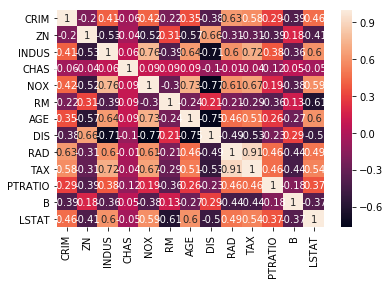

In [13]:

#Created a dataframe without the price col, since we need to see the correlation between the variables
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

From above correlation map, RAD and TAX are highly correlated (0.91) . DIS and AGE also show high correlation of -0.75

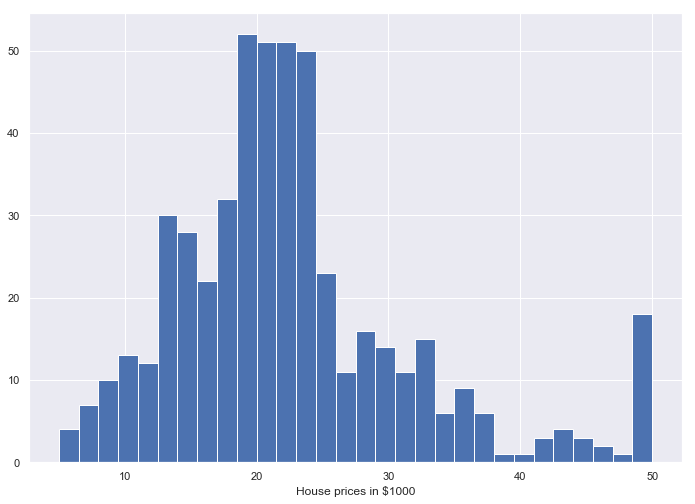

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

<a id="baseline"></a>
<a href="#methods">Back to Methods</a>

### Goodness of Fit for entire boston dataset

In [113]:
X_train_all=bos.drop(['PRICE'],axis=1)
X_train_all.head()
Y_train_all=bos['PRICE']

<a id="baseline_results"></a>
<a href="#results">Back to Results</a>

In [114]:


reg_1 = LinearRegression()
reg_1.fit(X_train_all, Y_train_all)

y_train_predict_all = reg_1.predict(X_train_all)
rmse_all = (np.sqrt(mean_squared_error(Y_train_all, y_train_predict_all)))
r2_all = round(reg_1.score(X_train_all, Y_train_all),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_all))
print('R2 score is {}'.format(r2_all))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.679191295697282
R2 score is 0.74




In [231]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
rfe = RFE(reg_1)
rfe = rfe.fit(X_train_all, Y_train_all)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True False False  True False
  True]
[3 5 4 1 1 1 8 1 2 6 1 7 1]


In [245]:
b=bos.columns.tolist()
print(type(b))
rank=rfe.ranking_.tolist()
print(type(rank))

bos_feat_sel = pd.DataFrame(list(zip(b, rank)), 
               columns =['columnname', 'ranking'])
bos_feat_sel

<class 'list'>
<class 'list'>


,columnname,ranking
0,CRIM,3
1,ZN,5
2,INDUS,4
3,CHAS,1
4,NOX,1
5,RM,1
6,AGE,8
7,DIS,1
8,RAD,2
9,TAX,6


We used feature selection technique to identify importatnt features. We want to add nulls to those features to make our comparative study. Above we have used RFE ( Recursive Feature Elimination ) to identify which attributes contribute the most to predicting the target variable. Features with ranking=1, are the most contributing features. 

Text(0.5, 1.0, 'Actual Prices vs Predicted prices- All data')

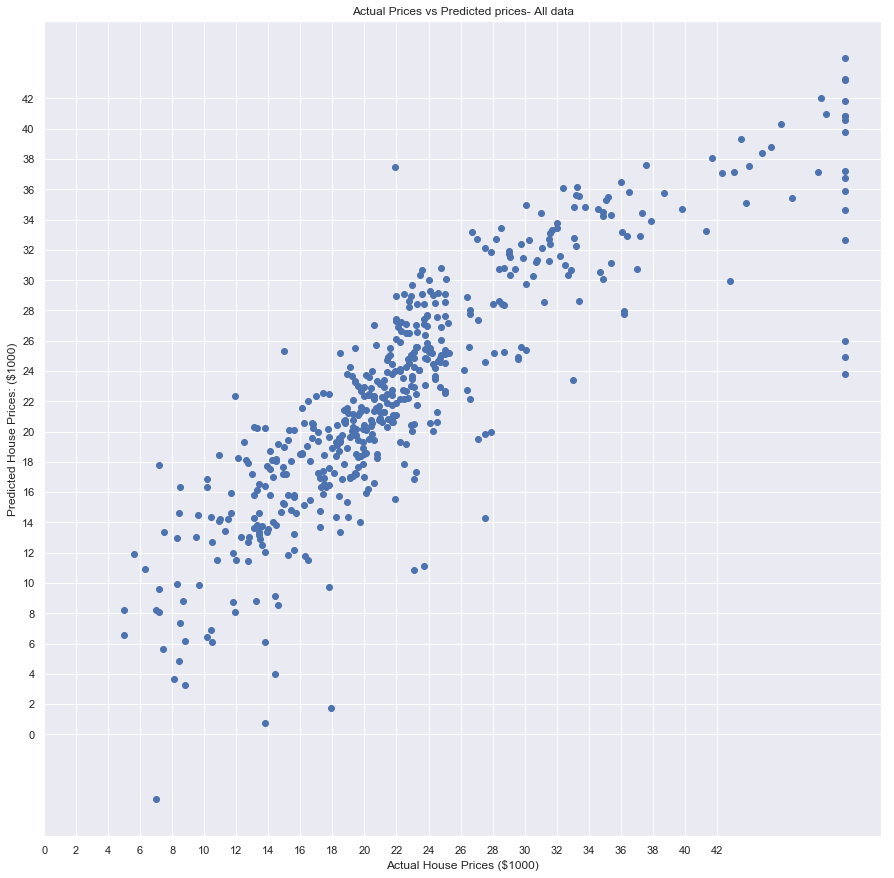

In [115]:
plt.figure(figsize=(15,15))
plt.scatter(Y_train_all, y_train_predict_all)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_train_predict_all)),2))
plt.yticks(range(0, int(max(y_train_predict_all)),2))
plt.title("Actual Prices vs Predicted prices- All data")

From EDA, below columns look interesting :

ZN       proportion of residential land zoned for lots over 25,000 sq.ft. -- Has about 50% data as 0. It would be interesting to see if a lot of 0's get nullified would change the prediction

CHAS is the only categorical variable. Can try using that

RAD/TAX are correlated, if one of them is used to nullify

B - has high variability

<a id="car"></a>
<a href="#methods">Back to Methods</a>

### Data Missing Completely at Random (CAR)

In [127]:
def new_df(orig_df,per,col_name,seed):
    df_c=orig_df.copy()
    df_size=orig_df.shape[0]
    np.random.seed(0)
    num_nulls=int(round((per/100)*(df_size-1)))
    null_pos=np.random.randint(low=0,high=df_size-1, size=num_nulls)
    for i in null_pos:
        df_c.loc[i][col_name]=None
    return df_c

In [262]:
def df_impute(orig_df,function):
    imputed_df=orig_df.copy()
    if function=='mean':
        imputed_df.fillna(imputed_df.mean(), inplace=True)
    elif function=='median':
        imputed_df.fillna(imputed_df.median(), inplace=True)
    elif function=='mode':
        imputed_df.fillna(imputed_df.mode(), inplace=True)
    else:
        imputed_df.fillna(int(function), inplace=True)
    return imputed_df

In [174]:
 def linear_reg_goodness(df,target):
    
    X_train=df.drop([target],axis=1)
    X_train.head()
    Y_train=df[target]
    

    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    y_train_predict = reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = round(reg.score(X_train, Y_train),2)
    goodness=[rmse,r2]
    return goodness

<a id="car_results"></a>
<a href="#results">Back to Results</a>

In [313]:
bos_car_rm_df=[]
per_car_arr=[1,5,10,20,33,50]
bos_car_rm_df=[new_df(bos,p,'RM',999) for p in per_arr]
c=0
for b_df in bos_car_rm_df:
    print(per_arr[c],"% nulls")
    print(b_df.isnull().sum())
    c=c+1
    print("=======================")
    
bos_car_rm_impute_zero_df=[]
bos_car_rm_impute_zero_df=[df_impute(df,'0') for df in bos_car_rm_df]
goodness_car_rm_zero=[]
goodness_car_rm_zero=[linear_reg_goodness(df,'PRICE') for df in bos_car_rm_impute_zero_df]
goodness_car_rm_zero

1 % nulls
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
5 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         23
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
10 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         45
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
20 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         87
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
33 % nulls
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM         136
AGE          0
DIS          0
RAD  

[[4.883623032349549, 0.72],
 [4.976610046557696, 0.71],
 [4.967029264262159, 0.71],
 [5.035806168801492, 0.7],
 [5.057302565835696, 0.7],
 [5.058254823398979, 0.7]]

In [314]:
bos_car_rm_df=[]
per_car_arr=[1,5,10,20,33,50]
bos_car_rm_df=[new_df(bos,p,'RM',999) for p in per_arr]
bos_car_rm_impute_mean_df=[]
bos_car_rm_impute_mean_df=[df_impute(df,'mean') for df in bos_car_rm_df]
goodness_car_rm_mean=[]
goodness_car_rm_mean=[linear_reg_goodness(df,'PRICE') for df in bos_car_rm_impute_mean_df]
goodness_car_rm_mean

[[4.692669148523668, 0.74],
 [4.713891593417272, 0.74],
 [4.721270539405498, 0.74],
 [4.853928441325208, 0.72],
 [4.8924632910685535, 0.72],
 [4.943278395989387, 0.71]]

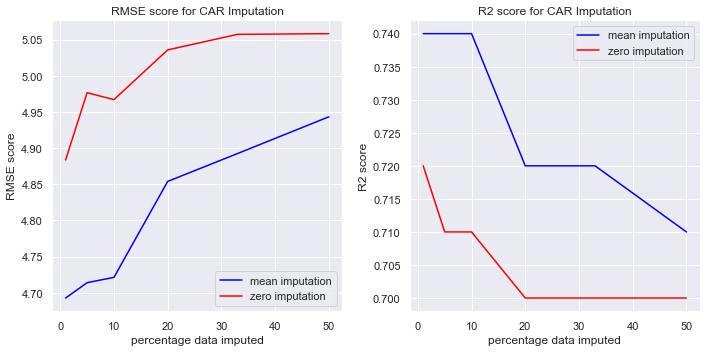

In [330]:
rmse_mean=[r[0] for r in goodness_car_rm_mean]
rmse_zero=[r[0] for r in goodness_car_rm_zero]

r2_mean=[r[1] for r in goodness_car_rm_mean]
r2_zero=[r[1] for r in goodness_car_rm_zero]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(per_car_arr,rmse_mean,color='blue',label='mean imputation')
plt.plot(per_car_arr,rmse_zero,color='red',label='zero imputation')
plt.title("RMSE score for CAR Imputation")
plt.xlabel("percentage data imputed")
plt.ylabel("RMSE score")
plt.legend()

plt.subplot(1,2,2)
plt.plot(per_car_arr,r2_mean,color='blue',label='mean imputation')
plt.plot(per_car_arr,r2_zero,color='red',label='zero imputation')
plt.title("R2 score for CAR Imputation")
plt.xlabel("percentage data imputed")
plt.ylabel("R2 score")
plt.legend()
plt.tight_layout()

<a id="mar"></a>
<a href="#methods">Back to Methods</a>

### Missing at Random (MAR)

AGE>77, then NOX is random

In [203]:
def indices(list, filtr=lambda x: bool(x)):
    return [i for i,x in enumerate(list) if filtr(x)]

bos_age_mar_indices=indices(bos_test2['AGE'], lambda x: x>77)

In [206]:
np.random.choice(bos_age_mar_indices)

420

In [208]:
def new_mar_df(orig_df,per,col_name,seed,indices):
    df_c=orig_df.copy()
    df_size=orig_df.shape[0]
    np.random.seed(0)
    num_nulls=int(round((per/100)*(df_size-1)))
    for i in range(num_nulls):
        r=np.random.choice(indices)
        df_c.loc[r][col_name]=None
    return df_c

In [210]:
bos_mar_df=[]
per_mar_arr=[10,20,30]
bos_mar_df=[new_mar_df(bos,p,'NOX',999,bos_age_mar_indices) for p in per_mar_arr]

In [211]:
for i in bos_mar_df:
    print(i.shape)

(506, 14)
(506, 14)
(506, 14)


In [212]:
c=0
for b_df in bos_mar_df:
    print(per_mar_arr[c],"% nulls")
    print(b_df.isnull().sum())
    c=c+1
    print("=======================")

10 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX        43
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
20 % nulls
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX        80
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
dtype: int64
30 % nulls
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX        111
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
PRICE        0
dtype: int64


<a id="mar_results"></a>
<a href="#results">Back to Results</a>

In [332]:
bos_mar_impute_mean_df=[]
bos_mar_impute_mean_df=[df_impute(df,'mean') for df in bos_mar_df]
goodness_mar_mean=[]
goodness_mar_mean=[linear_reg_goodness(df,'PRICE') for df in bos_mar_impute_mean_df]
goodness_mar_mean

[[4.70402998841331, 0.74],
 [4.723059341701854, 0.74],
 [4.735517419799171, 0.73]]

In [216]:
bos_mar_impute_median_df=[]
bos_mar_impute_median_df=[df_impute(df,'median') for df in bos_mar_df]
goodness_mar_med=[]
goodness_mar_med=[linear_reg_goodness(df,'PRICE') for df in bos_mar_impute_median_df]
goodness_mar_med

[[4.707520717313876, 0.74],
 [4.727502712268104, 0.74],
 [4.739129689409382, 0.73]]

In [274]:
bos_mar_impute_zero_df=[]
bos_mar_impute_zero_df=[df_impute(df,'0') for df in bos_mar_df]
goodness_mar_zer=[]
goodness_mar_zer=[linear_reg_goodness(df,'PRICE') for df in bos_mar_impute_zero_df]
goodness_mar_zer

[[4.759011058351853, 0.73],
 [4.7671337980151085, 0.73],
 [4.768835718301644, 0.73]]

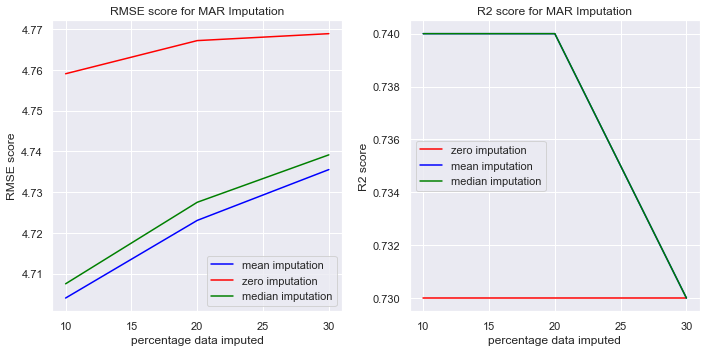

In [351]:
rmse_mean=[r[0] for r in goodness_mar_mean]
rmse_med=[r[0] for r in goodness_mar_med]
rmse_zero=[r[0] for r in goodness_mar_zer]

r2_mean=[r[1] for r in goodness_mar_mean]
r2_med=[r[1] for r in goodness_mar_med]
r2_zero=[r[1] for r in goodness_mar_zer]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(per_mar_arr,rmse_mean,color='blue',label='mean imputation')
plt.plot(per_mar_arr,rmse_zero,color='red',label='zero imputation')
plt.plot(per_mar_arr,rmse_med,color='green',label='median imputation')
plt.title("RMSE score for MAR Imputation")
plt.xlabel("percentage data imputed")
plt.ylabel("RMSE score")
plt.legend()

plt.subplot(1,2,2)
plt.plot(per_mar_arr,r2_zero,color='red',label='zero imputation')
plt.plot(per_mar_arr,r2_mean,color='blue',label='mean imputation')
plt.plot(per_mar_arr,r2_med,color='green',label='median imputation')
plt.title("R2 score for MAR Imputation")
plt.xlabel("percentage data imputed")
plt.ylabel("R2 score")
plt.legend()
plt.tight_layout()



<a id="nar"></a>
<a href="#methods">Back to Methods</a>

### NAR ( Not at Random )

if LSTAT > 17 then PTRATIO is null


In [277]:
bos_nar_df=bos.copy()
bos_nar_df[bos_nar_df['LSTAT']>17].count()

CRIM       126
ZN         126
INDUS      126
CHAS       126
NOX        126
RM         126
AGE        126
DIS        126
RAD        126
TAX        126
PTRATIO    126
B          126
LSTAT      126
PRICE      126
dtype: int64

In [286]:
bos_age_nar_indices=indices(bos_test2['LSTAT'], lambda x: x>17)
bos_age_nar_indices

for i in bos_age_nar_indices:
        bos_nar_df.loc[i]['PTRATIO']=None

In [287]:
bos_nar_df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO    126
B            0
LSTAT        0
PRICE        0
dtype: int64

<a id="nar_results"></a>
<a href="#results">Back to Results</a>

In [341]:
per_nar_arr=25
bos_nar_impute_zero_df=[]
bos_nar_impute_zero_df=df_impute(bos_nar_df,'0')
goodness_nar_zer=[]
goodness_nar_zer=linear_reg_goodness(bos_nar_impute_zero_df,'PRICE')
goodness_nar_zer

[4.900476647079992, 0.72]

In [292]:
bos_nar_impute_mean_df=[]
bos_nar_impute_mean_df=df_impute(bos_nar_df,'mean')
goodness_nar_mean=[]
goodness_nar_mean=linear_reg_goodness(bos_nar_impute_mean_df,'PRICE')
goodness_nar_mean

[4.78445404307053, 0.73]

In [336]:
bos_nar_impute_med_df=[]
bos_nar_impute_med_df=df_impute(bos_nar_df,'median')
goodness_nar_med=[]
goodness_nar_med=linear_reg_goodness(bos_nar_impute_med_df,'PRICE')
goodness_nar_med

[4.783571717221569, 0.73]

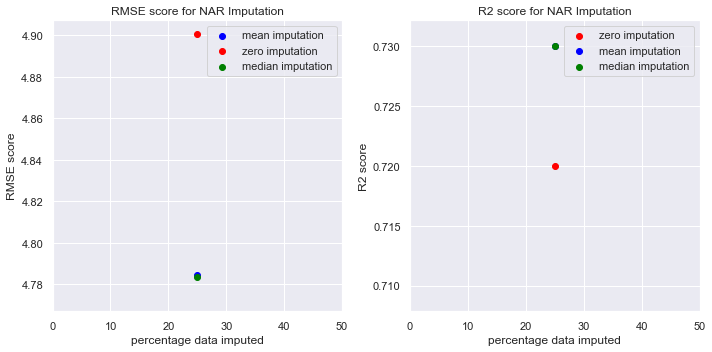

In [350]:
rmse_mean=goodness_nar_mean[0]
rmse_med=goodness_nar_med[0]
rmse_zero=goodness_nar_zer[0]

r2_mean=goodness_nar_mean[1]
r2_med= goodness_nar_med[1]
r2_zero= goodness_nar_zer[1]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(per_nar_arr,rmse_mean,color='blue',label='mean imputation',marker='o')
plt.scatter(per_nar_arr,rmse_zero,color='red',label='zero imputation',marker='o')
plt.scatter(per_nar_arr,rmse_med,color='green',label='median imputation',marker='o')
plt.title("RMSE score for NAR Imputation")
plt.xlabel("percentage data imputed")
plt.ylabel("RMSE score")
plt.legend()
plt.xlim([0,50])


plt.subplot(1,2,2)
plt.scatter(per_nar_arr,r2_zero,color='red',label='zero imputation')
plt.scatter(per_nar_arr,r2_mean,color='blue',label='mean imputation')
plt.scatter(per_nar_arr,r2_med,color='green',label='median imputation')
plt.title("R2 score for NAR Imputation")
plt.xlabel("percentage data imputed")
plt.ylabel("R2 score")
plt.legend()
plt.xlim([0,50])

plt.tight_layout()
